<a href="https://colab.research.google.com/github/Dinarque/INALCO_Inalco_M2_langage_de_scripts_2024_eleves/blob/main/Cours/Les_pandas_du_titanic_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice sur Pandas : analysons un grand classique parmi les datasets : les victimes du Titanic

Le dataset peut être trouvé https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

1) Chargez le dataset

In [2]:
import pandas as pd

url = 'https://github.com/datasciencedojo/datasets/raw/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2) Afficher des infos élémentaires sur le dataset

In [ ]:
df.info()

3) Combien de passagers ont survécu ? combien sont morts ? Donnez la réponse en pourcentage aussi. faites un Pie chart

In [ ]:
df['Survived'].value_counts()

In [ ]:
taux_survie = df['Survived'].mean() * 100
taux_survie

4) Quel était l'âge moyen des passagers ?

In [ ]:
age_moyen = df['Age'].mean()
age_moyen

5) Listez les passagers qui ont payé le tarif le plus élevé

In [ ]:
df[df['Fare'] == df['Fare'].max()]

6) Dessinez un pie chart représentant le genre des passager

<Axes: ylabel='count'>

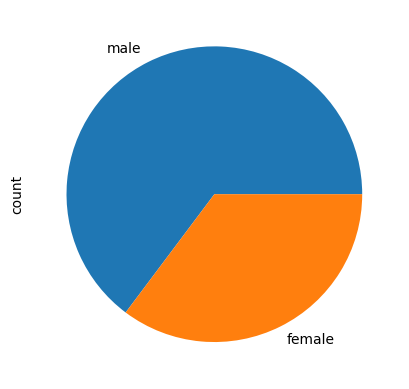

In [3]:
df["Sex"].value_counts().plot(kind="pie")

7) Calculer le taux de survie par genre

In [ ]:
df.groupby('Sex')['Survived'].mean() * 100

8) Trouver la répartition des classes des passagers

In [ ]:
df['Pclass'].value_counts()

9)Calculer le taux de survie par classe

In [ ]:
df.groupby('Pclass')['Survived'].mean() * 100

10) quels étaient les 10 prénoms masculins et les 10 prénoms féminins les plus fréquents ?

In [5]:
import re

def extract_first_name(name):
    # Extrait le prénom en supprimant Mr, Mrs, Miss etc.
    match = re.search(r'\(([^)]+)\)', name)  # Pour les cas où le prénom est entre parenthèses
    if match:
        first_name = match.group(1).split()[0]
    else:
        # Séparer par le préfixe (Mr, Miss, Mrs, etc.) et prendre le premier prénom après
        first_name = re.split(r'Mr\.|Mrs\.|Miss\.|Master\.|Dr\.', name)[-1].strip().split()[0]
    return first_name

# Appliquer la fonction pour extraire les prénoms
df['First Name'] = df['Name'].apply(extract_first_name)

# Séparer hommes et femmes
male_names = df[df['Sex'] == 'male']['First Name']
female_names = df[df['Sex'] == 'female']['First Name']

# Compter les prénoms les plus fréquents pour les hommes
top_male_names = male_names.value_counts().head(10)
print("Top 10 prénoms masculins les plus fréquents :")
print(top_male_names)

Top 10 prénoms masculins les plus fréquents :
First Name
William    35
John       20
George     13
Thomas     12
James      11
Henry      11
Charles    11
Richard    10
Johan       9
Edward      8
Name: count, dtype: int64
